In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Projeto de Visão Computacional

 aplicação de técnicas de classificação de imagens e Reconhecimento Óptico de Caracteres (OCR) usando o conjunto de dados MNIST.

In [2]:
# Carregar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

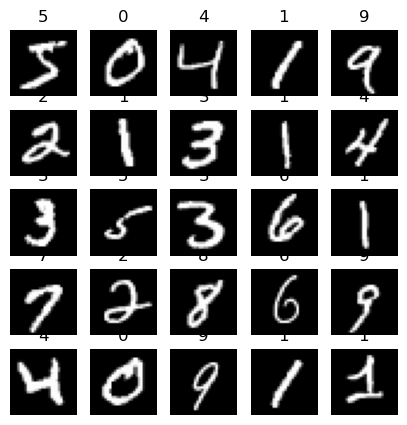

In [3]:
# Visualizar algumas amostras de imagens
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

## Verificar a forma dos tensores de imagem e rótulo

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

## Plotar um histograma dos rótulos

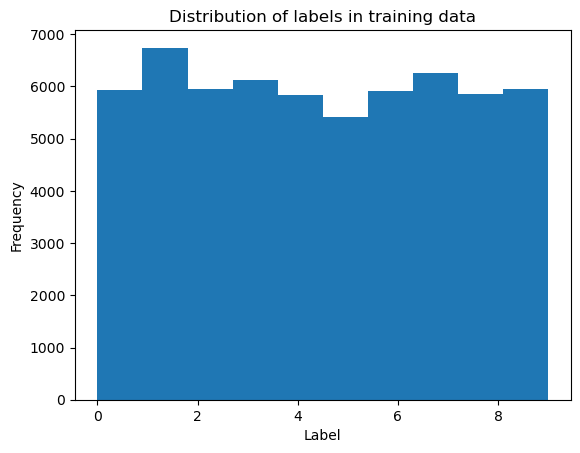

In [6]:
plt.hist(train_labels, bins=10)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of labels in training data')
plt.show()

## Criação e treinamento do modelo de rede neural artificial:

Definir a arquitetura do modelo

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\021120631\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8203 - loss: 9.0196 - val_accuracy: 0.8897 - val_loss: 0.5965
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.4984 - val_accuracy: 0.9087 - val_loss: 0.4400
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9253 - loss: 0.3151 - val_accuracy: 0.9252 - val_loss: 0.3364
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9318 - loss: 0.2750 - val_accuracy: 0.9390 - val_loss: 0.3216
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9399 - loss: 0.2457 - val_accuracy: 0.9384 - val_loss: 0.2950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9436 - loss: 0.2217 - val_accuracy: 0.9327 - val_loss: 0.2685
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9468 - loss: 0.2122 - val_accuracy: 0.9415 - val_loss: 0.2969
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9537 - loss: 0.1906 - 

In [10]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
'Test accuracy:', test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9397 - loss: 0.3001


('Test accuracy:', 0.9473999738693237)

## Trocar a rede neural simples por uma rede neural convolucional

In [11]:
# Definir a arquitetura da rede neural convolucional (CNN)
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\021120631\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# Compilar o modelo CNN
model_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [13]:
# Adicionar uma dimensão de canal para os dados de imagem
train_images_cnn = train_images[..., tf.newaxis]
test_images_cnn = test_images[..., tf.newaxis]

In [14]:
# Treinar o modelo CNN
history_cnn = model_cnn.fit(train_images_cnn, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8441 - loss: 0.9854 - val_accuracy: 0.9646 - val_loss: 0.1288
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9803 - loss: 0.0653 - val_accuracy: 0.9843 - val_loss: 0.0564
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9861 - loss: 0.0418 - val_accuracy: 0.9847 - val_loss: 0.0547
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9844 - val_loss: 0.0561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9817 - val_loss: 0.0755
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9827 - val_loss: 0.0666
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9867 - val_loss: 0.0602
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9934 - lo

In [15]:
# Avaliar o modelo CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels)
test_acc_cnn

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0744


0.9883000254631042

## Criar uma matriz de confusão

In [16]:
# Fazer previsões sobre os dados de teste
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
# Criar a matriz de confusão
conf_matrix = confusion_matrix(test_labels, predicted_labels)

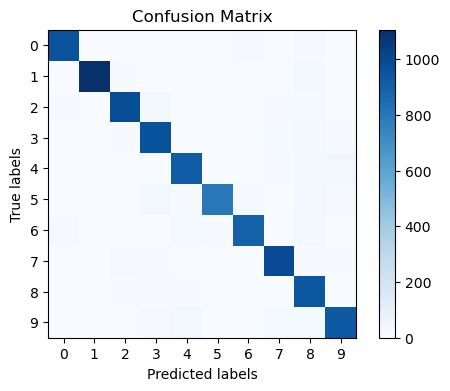

In [18]:
# Visualizar a matriz de confusão
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
plt.title('Confusion Matrix')
plt.show()